In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.figure()
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

In [2]:
# plt.rcParams.update({"font.size": 16})
# plt.rcParams.update({'font.size':10})
# plt.rcParams.update({'font.size':20})

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [4]:
import matplotlib
# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [5]:
import pandas as pd
import os

In [6]:
import phenom

In [7]:
import lal

In [8]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [9]:
import pycbc.types
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import pycbc.waveform.utils

In [10]:
import workflow_utils
import analysis_utils

In [11]:
import gpm_utils

# load data

In [12]:
# data_dict = workflow_utils.load_nr_data()
nr_data = workflow_utils.load_nr_data()

In [13]:
nr_data['times'][0]

-775.0

In [14]:
nr_data['times'][-1]

86.90000000019597

In [15]:
nr_data['df']

name      q     fring     fdamp  duration  t_final  \
0    q18a0a0c025_96_fine  18.00  0.063334  0.014140    1020.0    465.8   
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5   
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4   
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8   
4      q10c25e_T_112_448  10.00  0.066184  0.014119    1157.7    121.6   
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1   
6        q18a0a0c025_144  18.00  0.063334  0.014140    1028.3     88.8   
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8   
8        q18a0a0c025_120  18.00  0.063334  0.014140    1027.5    174.7   
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8   
10     SXS_BBH_0107_Res3   5.00  0.071862  0.014048    7440.1    449.9   
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1   
12     SXS_BBH_0107_Res5   5.00  0.071862  0.014048    7465.5    451.5   
13     SXS_BBH_0107_Res4   5.00  0.071862  0.014048    7457.2    449.8   
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8   
15     SXS_BBH_0169_Res4   2.00  0.083149  0.013774    3458.2    406.7   
16     SXS_BBH_0169_Res5   2.00  0.083149  0.013774    3468.3    406.6   
17     SXS_BBH_0169_Res3   2.00  0.083149  0.013774    3088.2    406.7   
18     SXS_BBH_0180_Res3   1.00  0.088087  0.013596    9359.5    236.6   
19     SXS_BBH_0303_Res3  10.00  0.066184  0.014119    3397.6    498.9   
20     SXS_BBH_0180_Res2   1.00  0.088087  0.013596    9354.6    236.8   
21     SXS_BBH_0303_Res4  10.00  0.066184  0.014119    3433.2    499.1   
22     SXS_BBH_0180_Res4   1.00  0.088087  0.013596    9270.5    236.4   
23     SXS_BBH_0303_Res5  10.00  0.066184  0.014119    3461.4    499.7   
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1   
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2   
26     RIT-BBH-0152-n120   5.00  0.071862  0.014048    4000.5    557.5   
27    RIT-eBBH-1090-n100   1.00  0.088087  0.013596    1493.9    362.0   
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8   
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3   
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2   
31     RIT-BBH-0112-n100   1.00  0.088087  0.013596   16963.4    419.5   
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5   
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6   
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2   
35     RIT-BBH-0090-n100   6.00  0.070079  0.014075    1746.7    392.9   
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8   
37    RIT-eBBH-1200-n100   2.00  0.083149  0.013774    1637.8    318.1   
38     RIT-BBH-0978-n144  10.00  0.066184  0.014119    1963.0    393.4   
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2   
40                GT0379   2.20  0.081956  0.013812     936.3    616.9   
41                GT0378   2.05  0.082845  0.013784     915.7    637.3   
42                GT0757   2.25  0.081668  0.013820    1429.1    420.0   
43                GT0380   2.35  0.081105  0.013837     957.9    595.3   
44                GT0454   4.00  0.074330  0.014004    1855.1    495.1   
45                GT0898   1.20  0.087693  0.013611    1793.9    286.8   
46                GT0446   2.00  0.083149  0.013774    1378.6    470.3   
47                GT0453   3.00  0.077907  0.013924    1599.7    549.9   
48                GT0727   1.75  0.084699  0.013722    1330.0    418.7   
49                GT0477   1.50  0.086221  0.013667    1286.6    361.9   
50                GT0738   1.25  0.087500  0.013619    1252.6    395.9   
51                GT0577   5.00  0.071862  0.014048    1281.6    574.2   
52                GT0565   2.50  0.080296  0.013861    1484.2    465.0   
53                GT0604

# load model

In [16]:
# could also call the model GPM: Generative Phenomenological Model?
# PP = load_model_utils.PhenProb(model_dir="model_100123")

gpm = gpm_utils.GPM(
     # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_26_02_23/components.cpkl',
     # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_27_02_23/components.cpkl',
     # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_28_02_23/components.cpkl',
    
    # last collocation = -100
    # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_03_03_23/components.cpkl',
    
    
     # merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_26_02_23/components.cpkl',
     # merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_27_02_23/components.cpkl',
    
     # last collocation = -100
     # merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_03_03_23/components.cpkl',
     # ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_26_02_23/components.cpkl',
     # ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_27_02_23/components.cpkl',
    

     # inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_26_02_23/components.cpkl',
     # merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_26_02_23/components.cpkl',
    
    # last collocation = -100
#      inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_04_03_23/components.cpkl',
#      merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_04_03_23/components.cpkl',
#      ringdown_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_ringdown_26_02_23/components.cpkl',
    
    
    # new as of sept 2023: using new kernel
    # # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_07_09_23/components.cpkl',
    # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_08_09_23/components.cpkl',
    # merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_07_09_23/components.cpkl',
    # ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_07_09_23/components.cpkl',
    # # inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_07_09_23/components.cpkl',
    # inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_08_09_23/components.cpkl',
    # merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_07_09_23/components.cpkl',
    # ringdown_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_ringdown_07_09_23/components.cpkl',
    

    #new as of 11 sept 2023: using new noise estimation
    inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_11_09_23/components.cpkl',
    merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_11_09_23/components.cpkl',
    ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_11_09_23/components.cpkl',
    inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_11_09_23/components.cpkl',
    merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_11_09_23/components.cpkl',
    ringdown_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_ringdown_11_09_23/components.cpkl',
    
)

# main function

In [17]:
# compute the match between the mean GPM and NR
# compute the match between the samples GPM and NR
# compute the match between the mean GPM and the samples GPM

In [18]:
# def compare_with_NR(idx, nr_data, GPM_model, n_samples=-1, Mtotal=100, delta_t=1/4096, low_frequency_cutoff=25, t_nr_start=-800):
#     q = nr_data['df']['q'].values[idx]
#     times = nr_data['times']
#     hp_gpm , hc_gpm = GPM_model.generate_pycbc_hp_hc(
#         q=q,
#         times=times,
#         M=Mtotal,
#         delta_t=delta_t,
#         n_samples=n_samples,
#     )
#     hp_nr, hc_nr = analysis_utils.get_nr_strain(
#         q=q,
#         strain=nr_data['strains'][idx],
#         times=nr_data['times'],
#         M=Mtotal,
#         delta_t=delta_t,
#         t_nr_start=t_nr_start,
#     )
    
#     hp1s = []
#     hc1s = []
    
#     for i in range(len(hp_gpm)):
#         hp1_, hc1_, hp2_, hc2_ = analysis_utils.my_coalign_waveforms(hp_gpm[i], hc_gpm[i], hp_nr, hc_nr, Mtotal)
#         hp1s.append(hp1_)
#         hc1s.append(hc1_)
        
#     # just take last one becase 2nd waveform remains fixed
#     hp2 = hp2_
#     hc2 = hc2_
    
#     matches = [analysis_utils.compute_match(hp1s[i], hp2, low_frequency_cutoff) for i in range(len(hp1s))]
#     matches = np.array(matches)
    
#     return matches, hp1s, hc1s, hp2, hc2

In [19]:
def compare_waveforms(hp1s, hc1s, hp2, hc2, Mtotal, low_frequency_cutoff=25, left_trim_M=200, end_time_M=70, high_frequency_cutoff=None):
    """
    hp1s, hc1s: list of pycbc.TimeSeries
    hp2, hc2: single instance of pycbc.TimeSeries
    
    hp2 and hc2 are left unchanged (in terms of time/phase shifts) but their lengths can change
    """
    hp1s_out = []
    hc1s_out = []
    
    for i in range(len(hp1s)):
        hp1_, hc1_, hp2_, hc2_ = analysis_utils.my_coalign_waveforms(hp1s[i], hc1s[i], hp2, hc2, Mtotal, left_trim_M=left_trim_M, end_time_M=end_time_M)
        hp1s_out.append(hp1_)
        hc1s_out.append(hc1_)
        
    # just take last one becase 2nd waveform remains fixed
    hp2_out = hp2_
    hc2_out = hc2_
    
    matches = [analysis_utils.compute_match(hp1s_out[i], hp2_out, low_frequency_cutoff, high_frequency_cutoff) for i in range(len(hp1s_out))]
    matches = np.array(matches)
    
    return matches, hp1s_out, hc1s_out, hp2_out, hc2_out

In [20]:
# get list of mass-ratios that have multiple simulations

In [21]:
q_duplicates = np.sort(nr_data['df'].query('has_dup == True')['q'].unique())

In [22]:
q_duplicates

array([ 1.,  2.,  4.,  5.,  6.,  8., 10., 15., 18., 32.])

In [23]:
nr_data['df'].query('q==2')

name    q     fring     fdamp  duration  t_final  \
15   SXS_BBH_0169_Res4  2.0  0.083149  0.013774    3458.2    406.7   
16   SXS_BBH_0169_Res5  2.0  0.083149  0.013774    3468.3    406.6   
17   SXS_BBH_0169_Res3  2.0  0.083149  0.013774    3088.2    406.7   
37  RIT-eBBH-1200-n100  2.0  0.083149  0.013774    1637.8    318.1   
46              GT0446  2.0  0.083149  0.013774    1378.6    470.3   

    start_freq_100Msun    set  has_dup                      tag  
15           19.330074  train     True   q2.0_SXS_BBH_0169_Res4  
16           19.329955  train     True   q2.0_SXS_BBH_0169_Res5  
17           19.330978  train     True   q2.0_SXS_BBH_0169_Res3  
37           19.432679  train     True  q2.0_RIT-eBBH-1200-n100  
46           19.420446  train     True              q2.0_GT0446

# plots for paper

## comparing q = 4, 8, 15, 32

In [24]:
plt.rcParams.update({'font.size':16})

In [25]:
def get_data_for_plot(q, n_samples=100, distance=1e4, add_nr_nr_comparison=False):
    idxs = nr_data['df'].query(f"q == {q}").index
    print(f"q = {q}")

    times_ = nr_data['times']
    nr_strain_0 = nr_data['strains'][idxs[0]]
    nr_strain_other = nr_data['strains'][idxs[1:]]
    # delta_t = 1/4096.
    delta_t = 1/8192
    Mtotal = 100
    t_nr_start = -800
    
    # high_frequency_cutoff = 40
    high_frequency_cutoff = None

    hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
        distance=distance,
    )

    hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=n_samples,
        distance=distance,
    )

    hp_nr, hc_nr = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strain_0,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
        distance=distance,
    )


    # compare the mean model prediction with one of the NR waveforms
    matches_bar, hp1s_bar, hc1s_bar, hp2, hc2 = compare_waveforms(hp_gpm_bar, hc_gpm_bar, hp_nr, hc_nr, Mtotal, high_frequency_cutoff=high_frequency_cutoff)

    # compare samples from the model with one of the NR waveforms
    matches, hp1s, hc1s, _, _ = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_nr, hc_nr, Mtotal, high_frequency_cutoff=high_frequency_cutoff)
    
    
    if add_nr_nr_comparison == True:
        hp_nr_others = []
        hc_nr_others = []
        for i in range(len(idxs[1:])):
            hp_nr_other_, hc_nr_other_ = analysis_utils.get_nr_strain(
                q=q,
                strain=nr_strain_other[i],
                times=times_,
                M=Mtotal,
                delta_t=delta_t,
                t_nr_start=t_nr_start,
                distance=distance,
            )
            hp_nr_others.append(hp_nr_other_)
            hc_nr_others.append(hc_nr_other_)

        # compare a reference NR with the other NR simulations at the same mass-ratio:

        matches_nr_nr, hp1s_nr_nr, hc1s_nr_nr, hp2_nr_nr, hc2_nr_nr = compare_waveforms(hp_nr_others, hc_nr_others, hp_nr, hc_nr, Mtotal, high_frequency_cutoff=high_frequency_cutoff)
        return hp1s_bar, hc1s_bar, hp2, hc2, hp1s, hc1s, hp1s_nr_nr, hc1s_nr_nr

    else:
        return hp1s_bar, hc1s_bar, hp2, hc2, hp1s, hc1s

In [26]:
n_samples = 100

In [27]:
q4_data = {}
q4_data['hp1s_bar'], q4_data['hc1s_bar'], q4_data['hp2'], q4_data['hc2'], q4_data['hp1s'], q4_data['hc1s'] = get_data_for_plot(q=4, n_samples=n_samples)

q = 4


In [28]:
q8_data = {}
q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'] = get_data_for_plot(q=8, n_samples=n_samples)

q = 8


In [29]:
q15_data = {}
q15_data['hp1s_bar'], q15_data['hc1s_bar'], q15_data['hp2'], q15_data['hc2'], q15_data['hp1s'], q15_data['hc1s'] = get_data_for_plot(q=15, n_samples=n_samples)

q = 15


In [30]:
q32_data = {}
q32_data['hp1s_bar'], q32_data['hc1s_bar'], q32_data['hp2'], q32_data['hc2'], q32_data['hp1s'], q32_data['hc1s'] = get_data_for_plot(q=32, n_samples=n_samples)

q = 32


In [31]:
t_ = phenom.StoM(q4_data['hp1s_bar'][0].sample_times, 100)

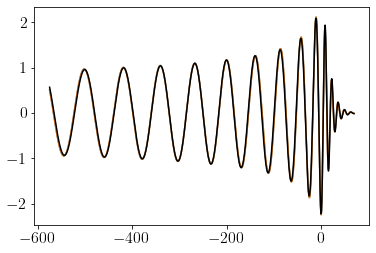

In [32]:
plt.plot(t_, q4_data['hp1s_bar'][0])
plt.plot(t_, q4_data['hp1s'][0])

plt.plot(t_, q4_data['hp2'], c='k')

In [33]:
phenom.StoM(q15_data['hp1s_bar'][0].sample_times, 100).shape

(2605,)

(-100.0, 100.0)

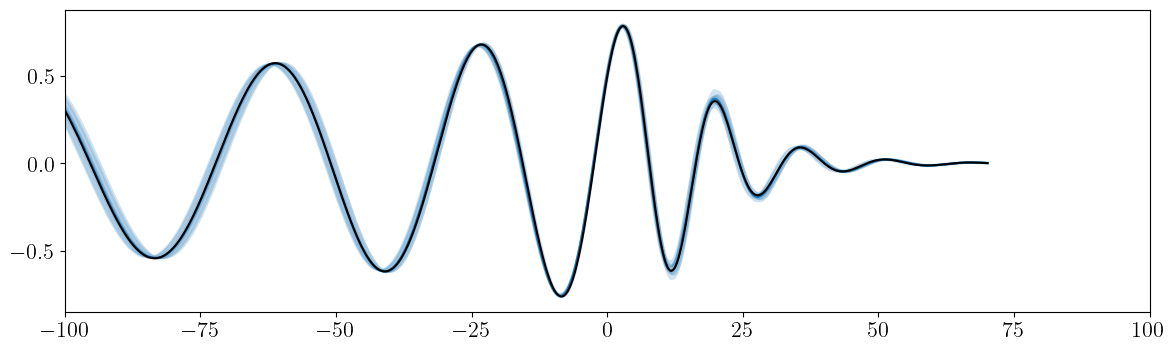

In [34]:
v_samples = np.array([q15_data['hp1s'][i].numpy() for i in range(n_samples)])

plt.figure(figsize=(14,4), dpi=100)
plt.plot(t_, q15_data['hp1s_bar'][0])

plt.plot(t_, v_samples[0], color='C0', alpha=0.2)
plt.plot(t_, v_samples[1:10].T, color='C0', alpha=0.2)

plt.fill_between(t_, y1=v_samples.min(0), y2=v_samples.max(0), alpha=0.2)
plt.plot(t_, q15_data['hp2'], c='k')

plt.xlim(-100,100)

In [35]:
v4_samples = np.array([q4_data['hp1s'][i].numpy() for i in range(n_samples)])
v8_samples = np.array([q8_data['hp1s'][i].numpy() for i in range(n_samples)])
v15_samples = np.array([q15_data['hp1s'][i].numpy() for i in range(n_samples)])
v32_samples = np.array([q32_data['hp1s'][i].numpy() for i in range(n_samples)])

In [36]:




# fig = plt.figure(figsize=(14,8), dpi=100)

# gs = GridSpec(2, 3, figure=fig, wspace=0.0, hspace=0.0)

# ax00 = fig.add_subplot(gs[0, :2])
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=0.2)
# plt.plot(times_M, q4_data['hp2'], c='k')
# plt.xlim(-575, -30)
# plt.xticks([])

# ax01 = fig.add_subplot(gs[0, 2:])
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=0.2)
# plt.plot(times_M, q4_data['hp2'], c='k')
# plt.xlim(-30, 80)
# plt.xticks([])
# plt.yticks([])

# ax10 = fig.add_subplot(gs[1, :2])
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=0.2)
# plt.plot(times_M, q8_data['hp2'], c='k')
# plt.xlim(-575, -30)
# # plt.xticks([])

# ax11 = fig.add_subplot(gs[1, 2:])
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=0.2)
# plt.plot(times_M, q8_data['hp2'], c='k')
# plt.xlim(-30, 80)
# # plt.xticks([])
# plt.yticks([])

# plt.show()

In [37]:
# alpha_l=0.5
# alpha=0.3





# fig = plt.figure(figsize=(14,8), dpi=100)

# gs = GridSpec(2, 3, figure=fig, wspace=0.0, hspace=0.0)

# ax00 = fig.add_subplot(gs[0, :2])
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k')
# plt.xlim(-575, -30)
# plt.xticks([])

# ax01 = fig.add_subplot(gs[0, 2:])
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k')
# plt.xlim(-30, 80)
# plt.xticks([])
# plt.yticks([])

# ax10 = fig.add_subplot(gs[1, :2])
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k')
# plt.xlim(-575, -30)
# # plt.xticks([])

# ax11 = fig.add_subplot(gs[1, 2:])
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k')
# plt.xlim(-30, 80)
# # plt.xticks([])
# plt.yticks([])

# plt.show()

Text(0.06, 0.5, '$h_+(t)$')

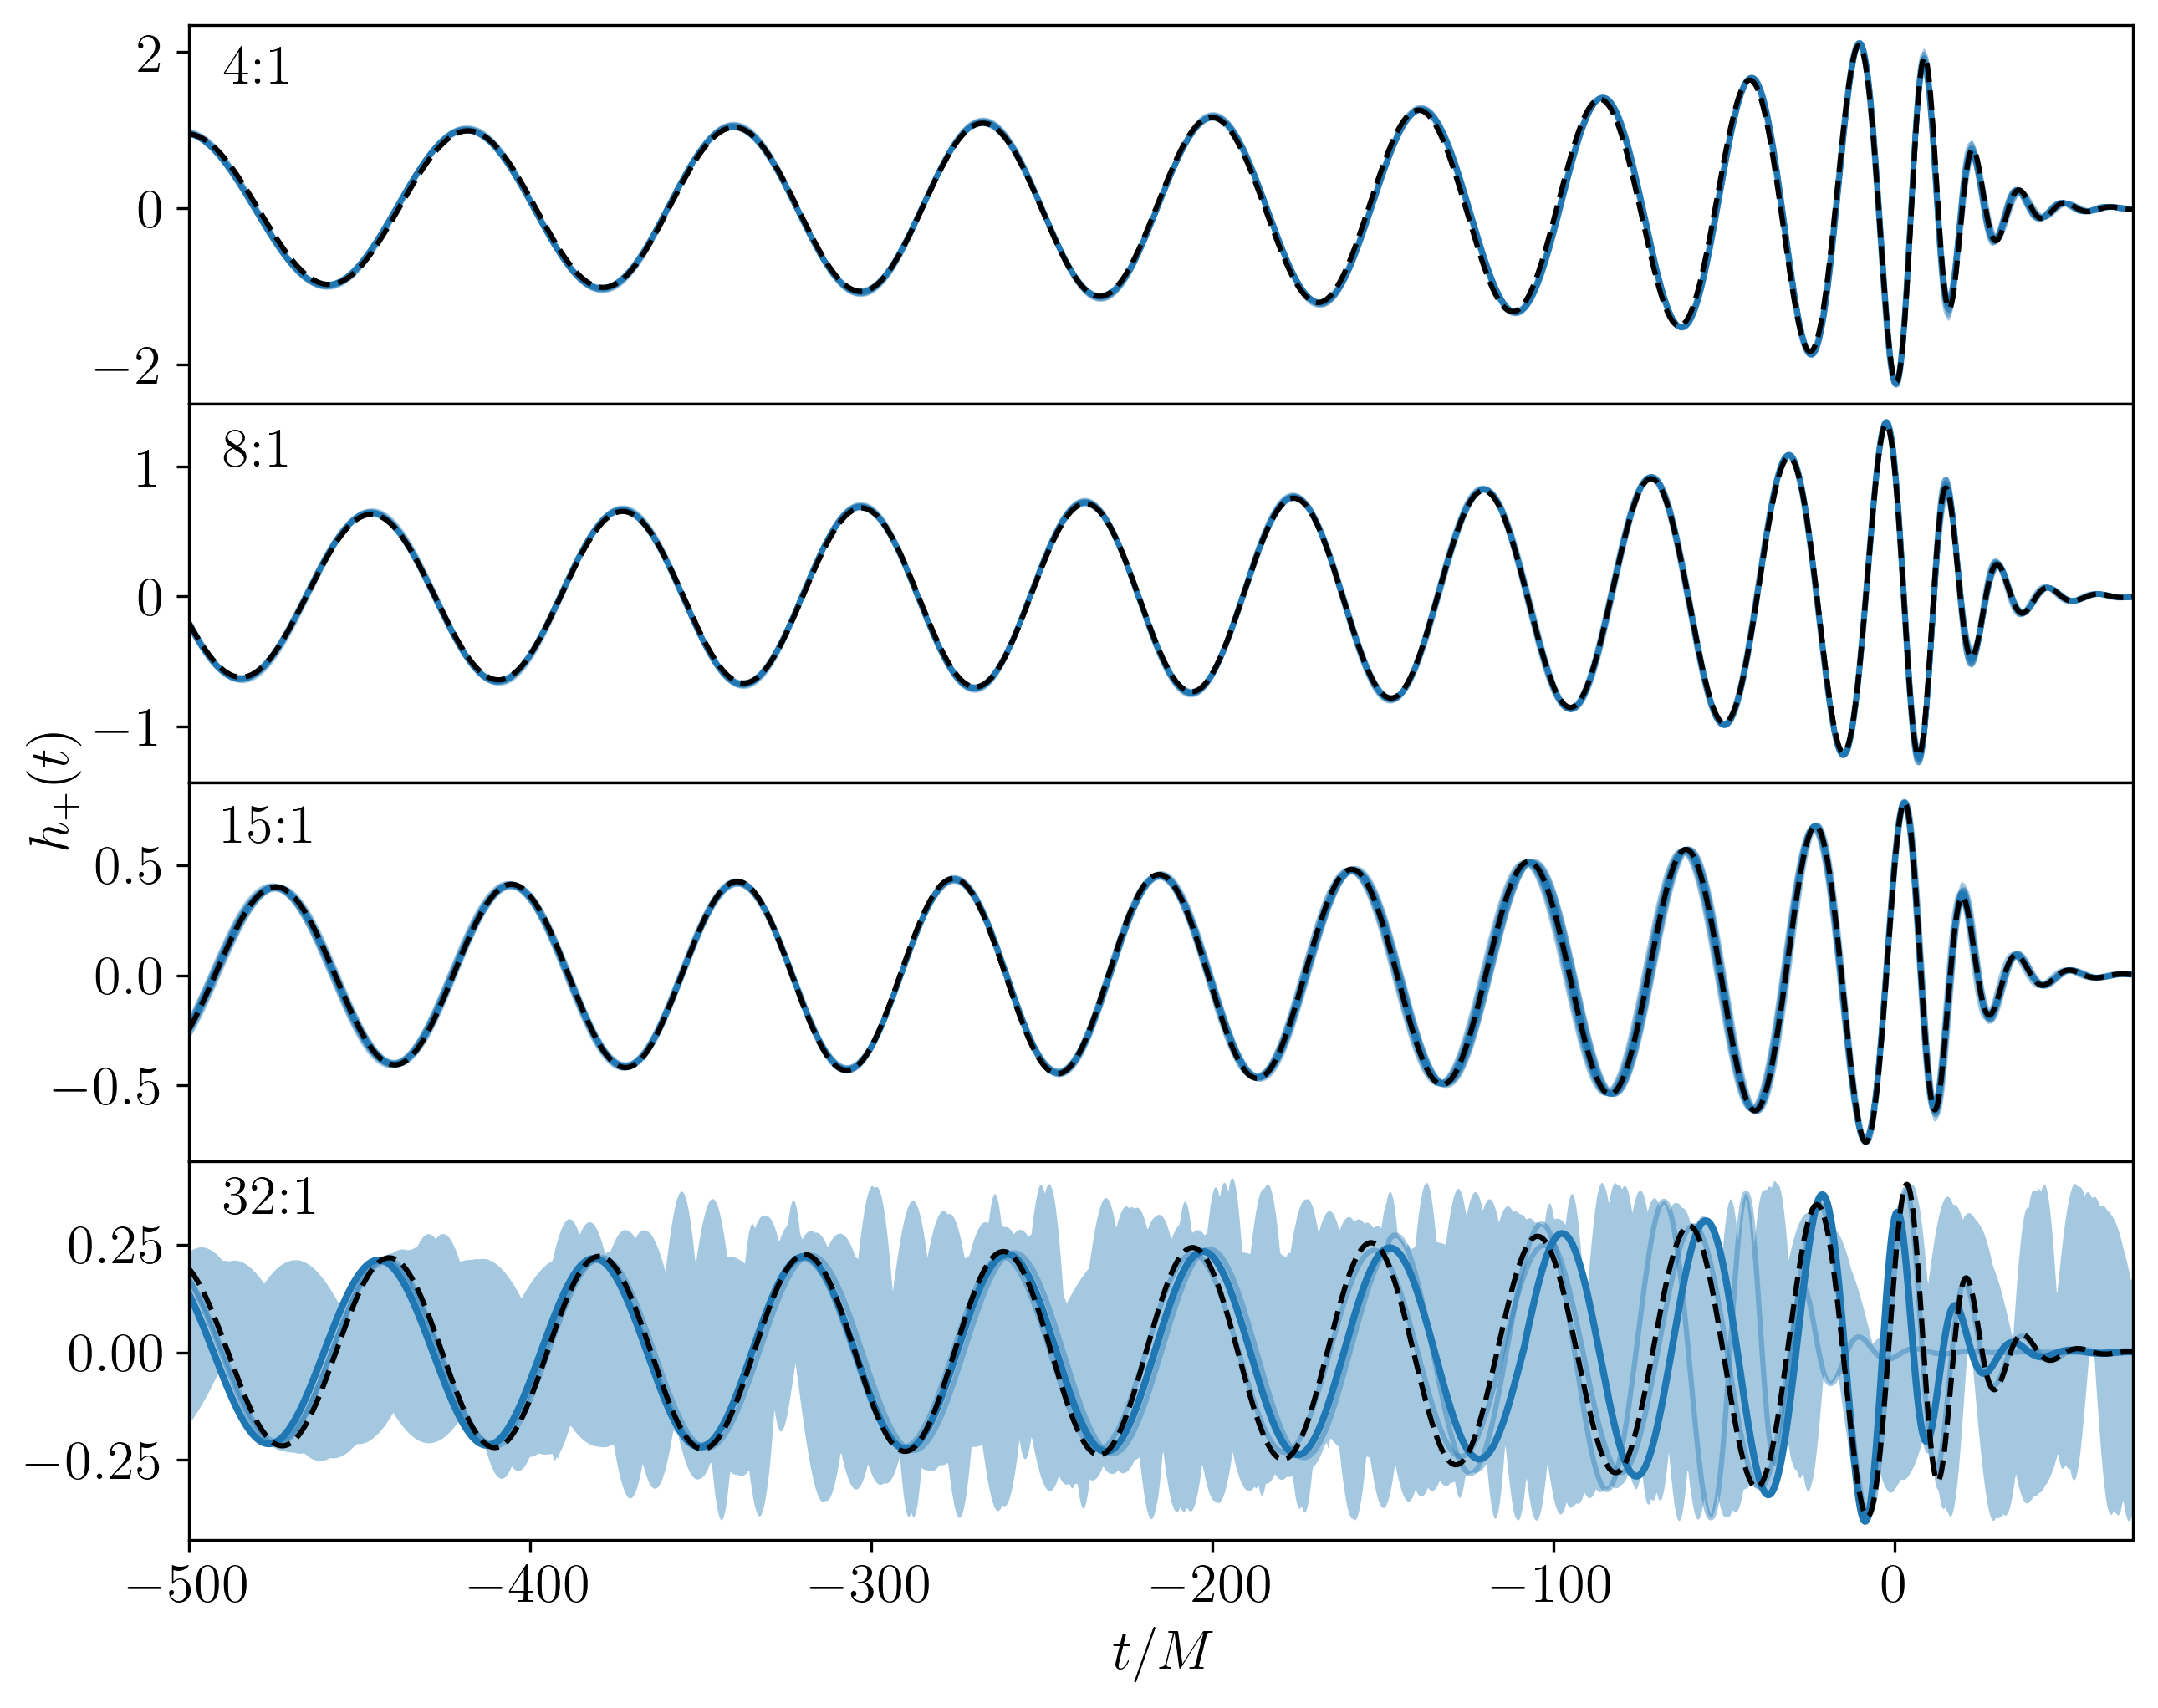

In [38]:
alpha=0.4
alpha_l=0.4
xlims=[-500, 70]
# xlims=[-100, 70]
fig=plt.figure(figsize=(10,8), dpi=300)
plt.subplots_adjust(hspace=(0))
plt.subplot(4, 1, 1)


plt.plot(t_, q4_data['hp1s_bar'][0])
plt.plot(t_, v4_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v4_samples[1:10].T, color='C0', alpha=alpha_l)
plt.fill_between(t_, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=alpha)
plt.plot(t_, q4_data['hp2'], c='k', ls='--', label='q4')
plt.text(-490, 1.6, "4:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 2)
plt.plot(t_, q8_data['hp1s_bar'][0])
plt.plot(t_, v8_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v8_samples[1:10].T, color='C0', alpha=alpha_l)
plt.fill_between(t_, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=alpha)
plt.plot(t_, q8_data['hp2'], c='k', ls='--', label='q8')
plt.text(-490, 1, "8:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 3)
plt.plot(t_, q15_data['hp1s_bar'][0])
plt.plot(t_, v15_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v15_samples[1:10].T, color='C0', alpha=alpha_l)
plt.fill_between(t_, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
plt.plot(t_, q15_data['hp2'], c='k', ls='--', label='q15')
plt.text(-490, 0.6, "15:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 4)
plt.plot(t_, q32_data['hp1s_bar'][0], lw=2)
plt.plot(t_, v32_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v32_samples[1:2].T, color='C0', alpha=alpha_l)
plt.fill_between(t_, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
plt.plot(t_, q32_data['hp2'], c='k', ls='--', label='q32')
plt.text(-490, 0.32, "32:1")
plt.xlim(*xlims)
# plt.legend(loc='upper left', fontsize=10)
plt.xlabel("$t/M$")
fig.text(0.06, 0.5, r'$h_+(t)$', va='center', rotation='vertical')

# fig.supylabel()
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_plot.png", bbox_inches = 'tight')
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_plot.png")

# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_plot.png")

In [39]:
# alpha=0.4
# alpha_l=0.4
# xlims=[-100, 70]
# plt.figure(figsize=(6,8), dpi=300)
# plt.subplots_adjust(hspace=(0))
# plt.subplot(4, 1, 1)
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=alpha)
# plt.plot(times_M, q4_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 2)
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=alpha)
# plt.plot(times_M, q8_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 3)
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 4)
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)

# opening plot

In [40]:
nr_data['df'].query(f"q == 4")

name    q    fring     fdamp  duration  t_final  \
1        q4a0_T_96_384  4.0  0.07433  0.014004    2202.1    229.5   
5        q4a0_T_80_320  4.0  0.07433  0.014004    2199.5    689.1   
9       q4a0_T_112_448  4.0  0.07433  0.014004    2202.5    151.8   
11   SXS_BBH_0167_Res5  4.0  0.07433  0.014004    3115.7    404.1   
14   SXS_BBH_0167_Res3  4.0  0.07433  0.014004    2874.0    403.8   
28  RIT-eBBH-1133-n100  4.0  0.07433  0.014004    2143.1    712.8   
44              GT0454  4.0  0.07433  0.014004    1855.1    495.1   

    start_freq_100Msun   set  has_dup                      tag  
1            21.017192  test     True       q4.0_q4a0_T_96_384  
5            20.716335  test     True       q4.0_q4a0_T_80_320  
9            20.892015  test     True      q4.0_q4a0_T_112_448  
11           20.834667  test     True   q4.0_SXS_BBH_0167_Res5  
14           20.826849  test     True   q4.0_SXS_BBH_0167_Res3  
28           20.749856  test     True  q4.0_RIT-eBBH-1133-n100  
44           20.814909  test     True              q4.0_GT0454

In [41]:
nr_data['df'].query(f"q == 10")

name     q     fring     fdamp  duration  t_final  \
4   q10c25e_T_112_448  10.0  0.066184  0.014119    1157.7    121.6   
19  SXS_BBH_0303_Res3  10.0  0.066184  0.014119    3397.6    498.9   
21  SXS_BBH_0303_Res4  10.0  0.066184  0.014119    3433.2    499.1   
23  SXS_BBH_0303_Res5  10.0  0.066184  0.014119    3461.4    499.7   
38  RIT-BBH-0978-n144  10.0  0.066184  0.014119    1963.0    393.4   

    start_freq_100Msun    set  has_dup                      tag  
4            24.089458  train     True  q10.0_q10c25e_T_112_448  
19           24.051628  train     True  q10.0_SXS_BBH_0303_Res3  
21           23.964726  train     True  q10.0_SXS_BBH_0303_Res4  
23           23.954080  train     True  q10.0_SXS_BBH_0303_Res5  
38           23.965060  train     True  q10.0_RIT-BBH-0978-n144

In [42]:
nr_data['df'].query(f"set == 'test' & has_dup == True").sort_values(by='q')

name     q     fring     fdamp  duration  t_final  \
1          q4a0_T_96_384   4.0  0.074330  0.014004    2202.1    229.5   
5          q4a0_T_80_320   4.0  0.074330  0.014004    2199.5    689.1   
9         q4a0_T_112_448   4.0  0.074330  0.014004    2202.5    151.8   
11     SXS_BBH_0167_Res5   4.0  0.074330  0.014004    3115.7    404.1   
14     SXS_BBH_0167_Res3   4.0  0.074330  0.014004    2874.0    403.8   
28    RIT-eBBH-1133-n100   4.0  0.074330  0.014004    2143.1    712.8   
44                GT0454   4.0  0.074330  0.014004    1855.1    495.1   
2    q8a0a0_T_96_504n512   8.0  0.067697  0.014104     953.1    430.4   
3     q8a0a0c05_T_80_420   8.0  0.067697  0.014104     941.9    259.8   
7   q8a0a0_T_112_588n768   8.0  0.067697  0.014104     957.9    207.8   
30     RIT-BBH-0942-n120  15.0  0.064066  0.014135    1162.8    330.2   
33     RIT-BBH-0373-n140  15.0  0.064066  0.014135    2725.0    437.6   
34     RIT-BBH-0792-n120  32.0  0.061687  0.014149    1558.3    191.2   
39     RIT-BBH-1025-n100  32.0  0.061687  0.014149    1474.0    240.2   

    start_freq_100Msun   set  has_dup                        tag  
1            21.017192  test     True         q4.0_q4a0_T_96_384  
5            20.716335  test     True         q4.0_q4a0_T_80_320  
9            20.892015  test     True        q4.0_q4a0_T_112_448  
11           20.834667  test     True     q4.0_SXS_BBH_0167_Res5  
14           20.826849  test     True     q4.0_SXS_BBH_0167_Res3  
28           20.749856  test     True    q4.0_RIT-eBBH-1133-n100  
44           20.814909  test     True                q4.0_GT0454  
2            22.213681  test     True   q8.0_q8a0a0_T_96_504n512  
3            21.837768  test     True    q8.0_q8a0a0c05_T_80_420  
7            22.608305  test     True  q8.0_q8a0a0_T_112_588n768  
30           25.475422  test     True    q15.0_RIT-BBH-0942-n120  
33           25.544053  test     True    q15.0_RIT-BBH-0373-n140  
34           28.943415  test     True    q32.0_RIT-BBH-0792-n120  
39           28.463783  test     True    q32.0_RIT-BBH-1025-n100

In [43]:
# q8_data = {}
# q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=4, n_samples=n_samples, add_nr_nr_comparison=True)


q8_data = {}
q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=8, n_samples=n_samples, add_nr_nr_comparison=True)


# q8_data = {}
# q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=15, n_samples=n_samples, add_nr_nr_comparison=True)

# q8_data = {}
# q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=32, n_samples=n_samples, add_nr_nr_comparison=True)



q = 8


In [44]:
m_bar = analysis_utils.compute_match(q8_data['hp1s_bar'][0], q8_data['hp2'], f_low=25)

In [45]:
m_samples = np.array([analysis_utils.compute_match(q8_data['hp1s'][i], q8_data['hp2'], f_low=25) for i in range(len(q8_data['hp1s']))])

In [46]:
m_bar

0.9998586713408841

In [47]:
m_5 = np.percentile(m_samples, 5)
m_5

0.9994309819146936

In [48]:
m_95 = np.percentile(m_samples, 95)
m_95

0.9999217275542376

In [49]:
m_lower = m_bar-m_5
m_lower

0.0004276894261905362

In [50]:
m_bar - m_lower

0.9994309819146936

In [51]:
m_upper = m_95-m_bar
m_upper

6.30562133534518e-05

In [52]:
m_bar + m_upper

0.9999217275542376

In [53]:
print(rf"$M = {m_bar:.3f}_{m_5:.3f}^{m_95:.3f}$")

$M = 1.000_0.999^1.000$


In [54]:
h_bar = q8_data['hp1s_bar'][0].numpy()

h_samples = np.array([q8_data['hp1s'][i].numpy() for i in range(n_samples)])

h_nr = q8_data['hp2'].numpy()

h_nr_other = np.array([q8_data['hp1s_nr_nr'][i].numpy() for i in range(len(q8_data['hc1s_nr_nr']))])

In [55]:
t_ = phenom.StoM(q8_data['hp1s_bar'][0].sample_times, 100)

Text(0.5, 1.0, '$M = {0.99986}_{0.99943}^{0.99992}$')

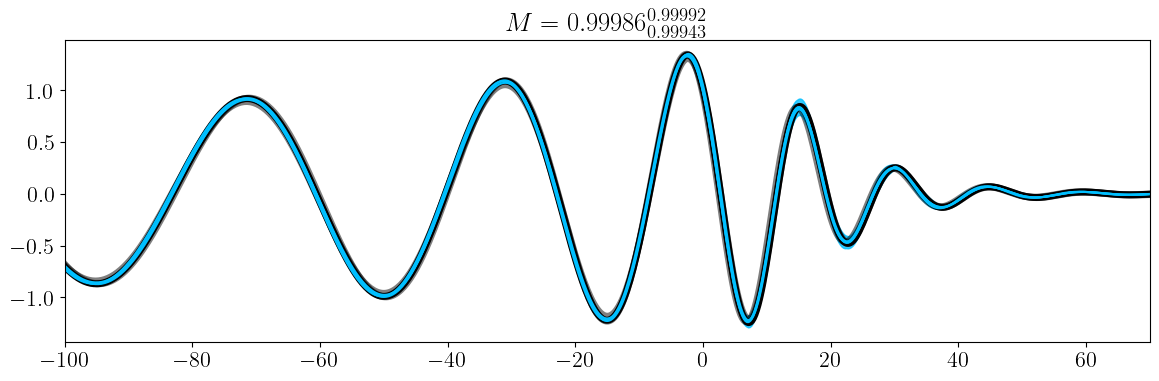

In [56]:
plt.figure(figsize=(14, 4), dpi=100)
plt.plot(t_, h_bar, lw=5, c='k')
plt.plot(t_, h_nr_other.T, ls='-', c='k', alpha=0.5, lw=5)
plt.plot(t_, h_nr, color='deepskyblue')
plt.plot(t_, h_samples[0], color='deepskyblue')
plt.plot(t_, h_samples[1:3].T, color='deepskyblue')
plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color='deepskyblue', alpha=0.8);


plt.xlim(-100, 70)

plt.title(rf"$M = {{{m_bar:.5f}}}_{{{m_5:.5f}}}^{{{m_95:.5f}}}$")

In [57]:
phi_bar = pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s_bar'][0], q8_data['hc1s_bar'][0])

phi_samples = [pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s'][i], q8_data['hc1s'][i]) for i in range(n_samples)]
phi_samples = np.array([phi_samples[i].numpy() for i in range(n_samples)])

phi_nr = pycbc.waveform.utils.phase_from_polarizations(q8_data['hp2'], q8_data['hc2'])

phi_nr_other = [pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s_nr_nr'][i], q8_data['hc1s_nr_nr'][i]) for i in range(len(q8_data['hc1s_nr_nr']))]
phi_nr_other = np.array([phi_nr_other[i].numpy() for i in range(len(phi_nr_other))])

In [58]:
phi_diff_nr_bar = phi_nr-phi_bar
phi_diff_nr_samples = (phi_nr.numpy()-phi_samples)
phi_diff_nr_nr = (phi_nr.numpy()-phi_nr_other)

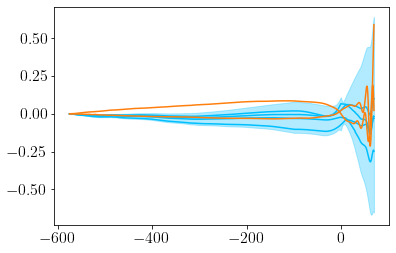

In [59]:
plt.figure()

plt.plot(t_, phi_diff_nr_bar, color='deepskyblue')
plt.plot(t_, phi_diff_nr_samples[0], color='deepskyblue')
plt.plot(t_, phi_diff_nr_samples[1:3].T, color='deepskyblue')
plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color='deepskyblue', alpha=0.3);
plt.plot(t_, phi_diff_nr_nr.T, c='C1')

# plt.xlim(-100, 100)

99 0.5 99.5 99.0


(0.0, 70.0)

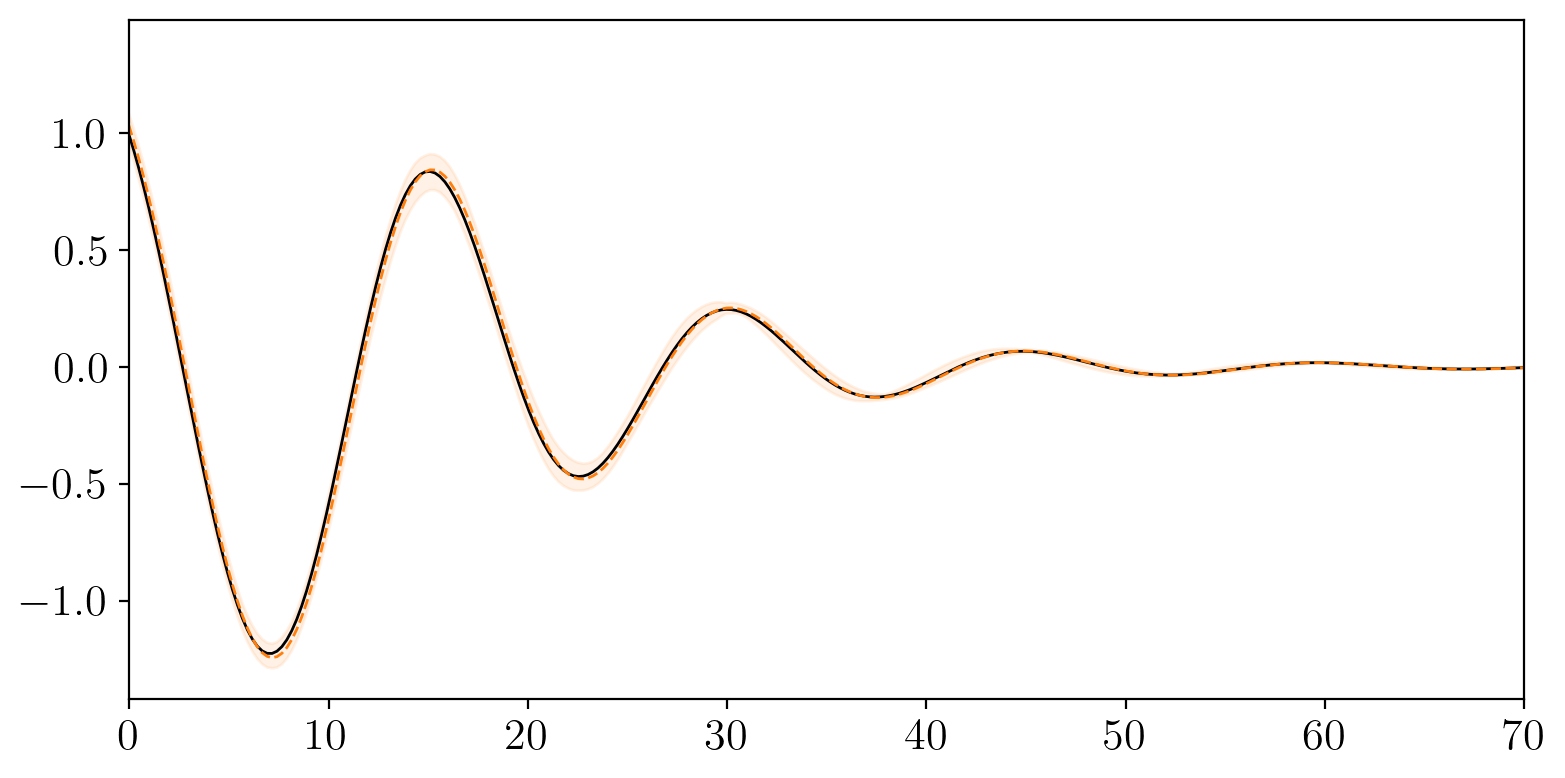

In [60]:
fig = plt.figure(figsize=(6*1.5,3*1.5), dpi=200)
plt.plot(t_, h_nr, lw=1, color='k', label='NR')
# plt.plot(t_, h_nr_other.T, lw=1, color='k', alpha=0.5)
plt.plot(t_, h_bar, c='C1', ls='--', lw=1, label='Model')

# plt.plot(t_, h_samples[:10].T, c='C1', alpha=0.4, lw=0.5)

w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($99^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color='C1', alpha=0.1);
# w=90
# p1=(100-w)/2
# p2=100 - (100-w)/2
# print(w, p1, p2, p2-p1)
# # ($90^{\rm{th}}\%$ width)
# plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color='C1', alpha=0.3);
# w=50
# p1=(100-w)/2
# p2=100 - (100-w)/2
# print(w, p1, p2, p2-p1)
# # ($50^{\rm{th}}\%$ width)
# plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color='C1', alpha=0.5);


plt.xlim(0, 70)

In [61]:
phi_diff_nr_samples.shape

(100, 2605)

In [62]:
phi_max_err = phi_diff_nr_samples.max(0)-phi_diff_nr_samples.min(0)

In [63]:
t_[2320]

-0.2715607424852588

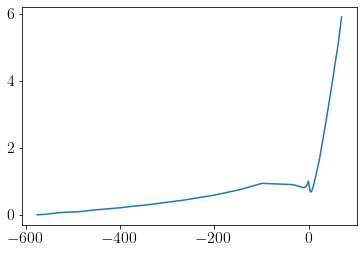

In [64]:
plt.plot(t_, phi_max_err/phi_max_err[2320])

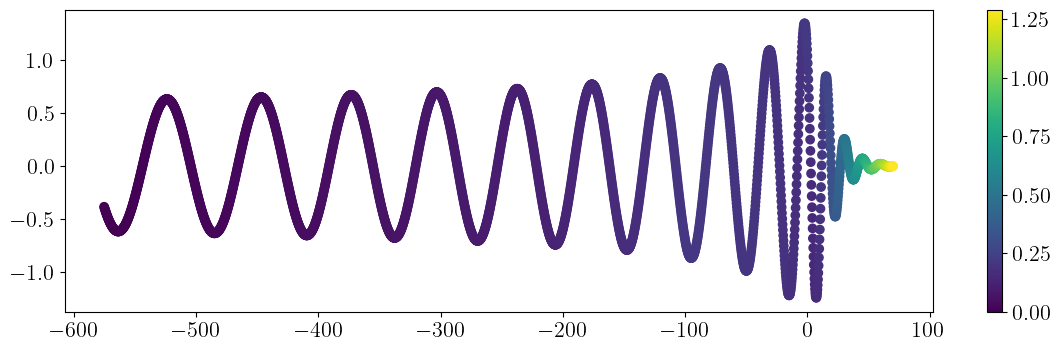

In [65]:
plt.figure(figsize=(14,4), dpi=100)
plt.scatter(t_, h_bar, c=phi_max_err)
plt.colorbar()

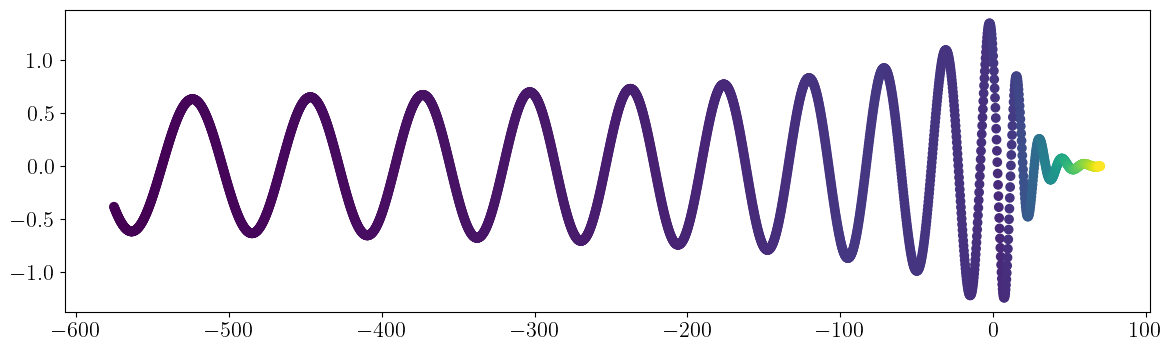

In [66]:
plt.figure(figsize=(14,4), dpi=100)
plt.scatter(t_, h_bar, c=phi_max_err/phi_max_err[2320])

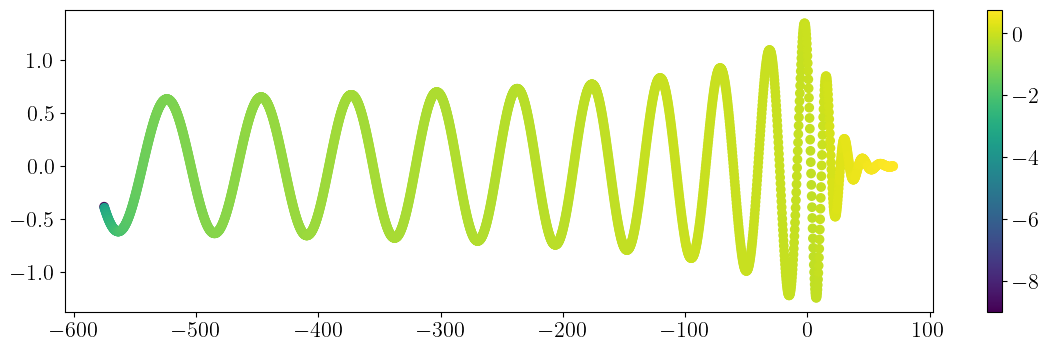

In [67]:
plt.figure(figsize=(14,4), dpi=100)
plt.scatter(t_, h_bar, c=np.log10(phi_max_err/phi_max_err[2320]+1e-9))
plt.colorbar()

In [68]:
phi_max_err[1]

6.317817707923723e-05

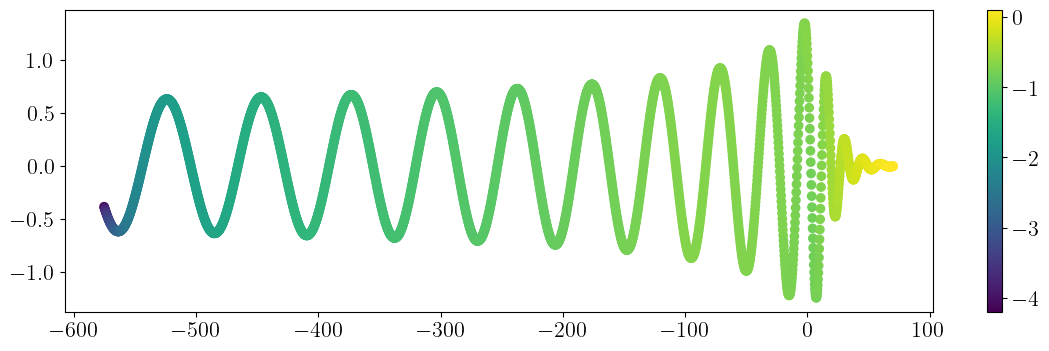

In [69]:
plt.figure(figsize=(14,4), dpi=100)
plt.scatter(t_, h_bar, c=np.log10(phi_max_err+phi_max_err[1]))
plt.colorbar()

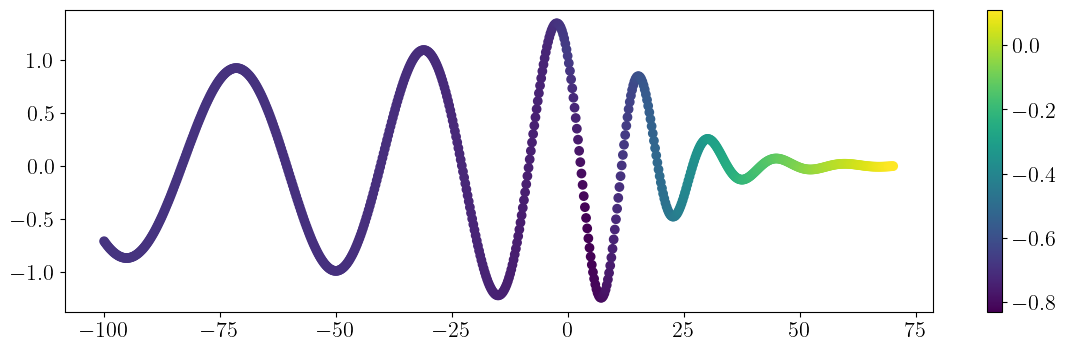

In [70]:
plt.figure(figsize=(14,4), dpi=100)
mask = t_ > -100
plt.scatter(t_[mask], h_bar[mask], c=np.log10(phi_max_err[mask]))
plt.colorbar()

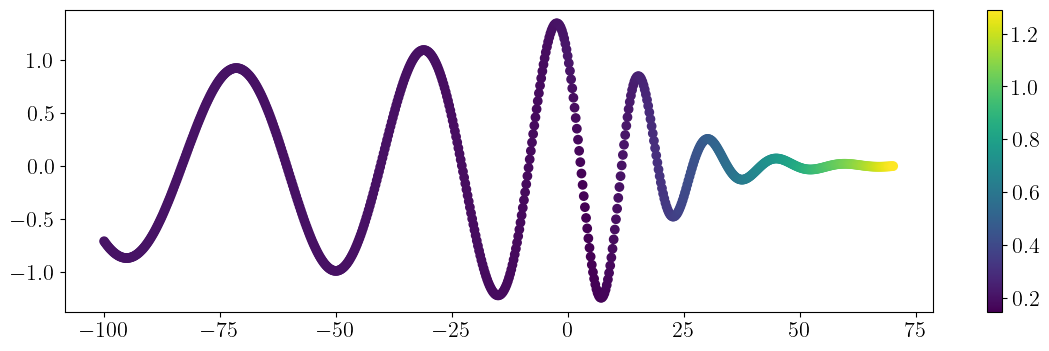

In [71]:
plt.figure(figsize=(14,4), dpi=100)
mask = t_ > -100
plt.scatter(t_[mask], h_bar[mask], c=phi_max_err[mask])
plt.colorbar()

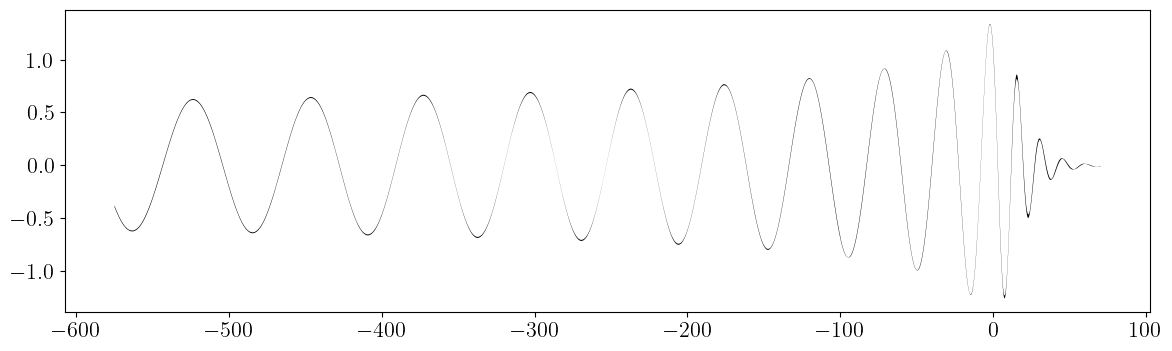

In [72]:
w=50
p1=(100-w)/2
p2=100 - (100-w)/2
plt.figure(figsize=(14,4), dpi=100)
plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color='k', alpha=1, lw=0.);


99 0.5 99.5 99.0
99 0.5 99.5 99.0
99 0.5 99.5 99.0
90 5.0 95.0 90.0
50 25.0 75.0 50.0
99 0.5 99.5 99.0
90 5.0 95.0 90.0
50 25.0 75.0 50.0


Text(0.5, 0.01, '$t/M$')

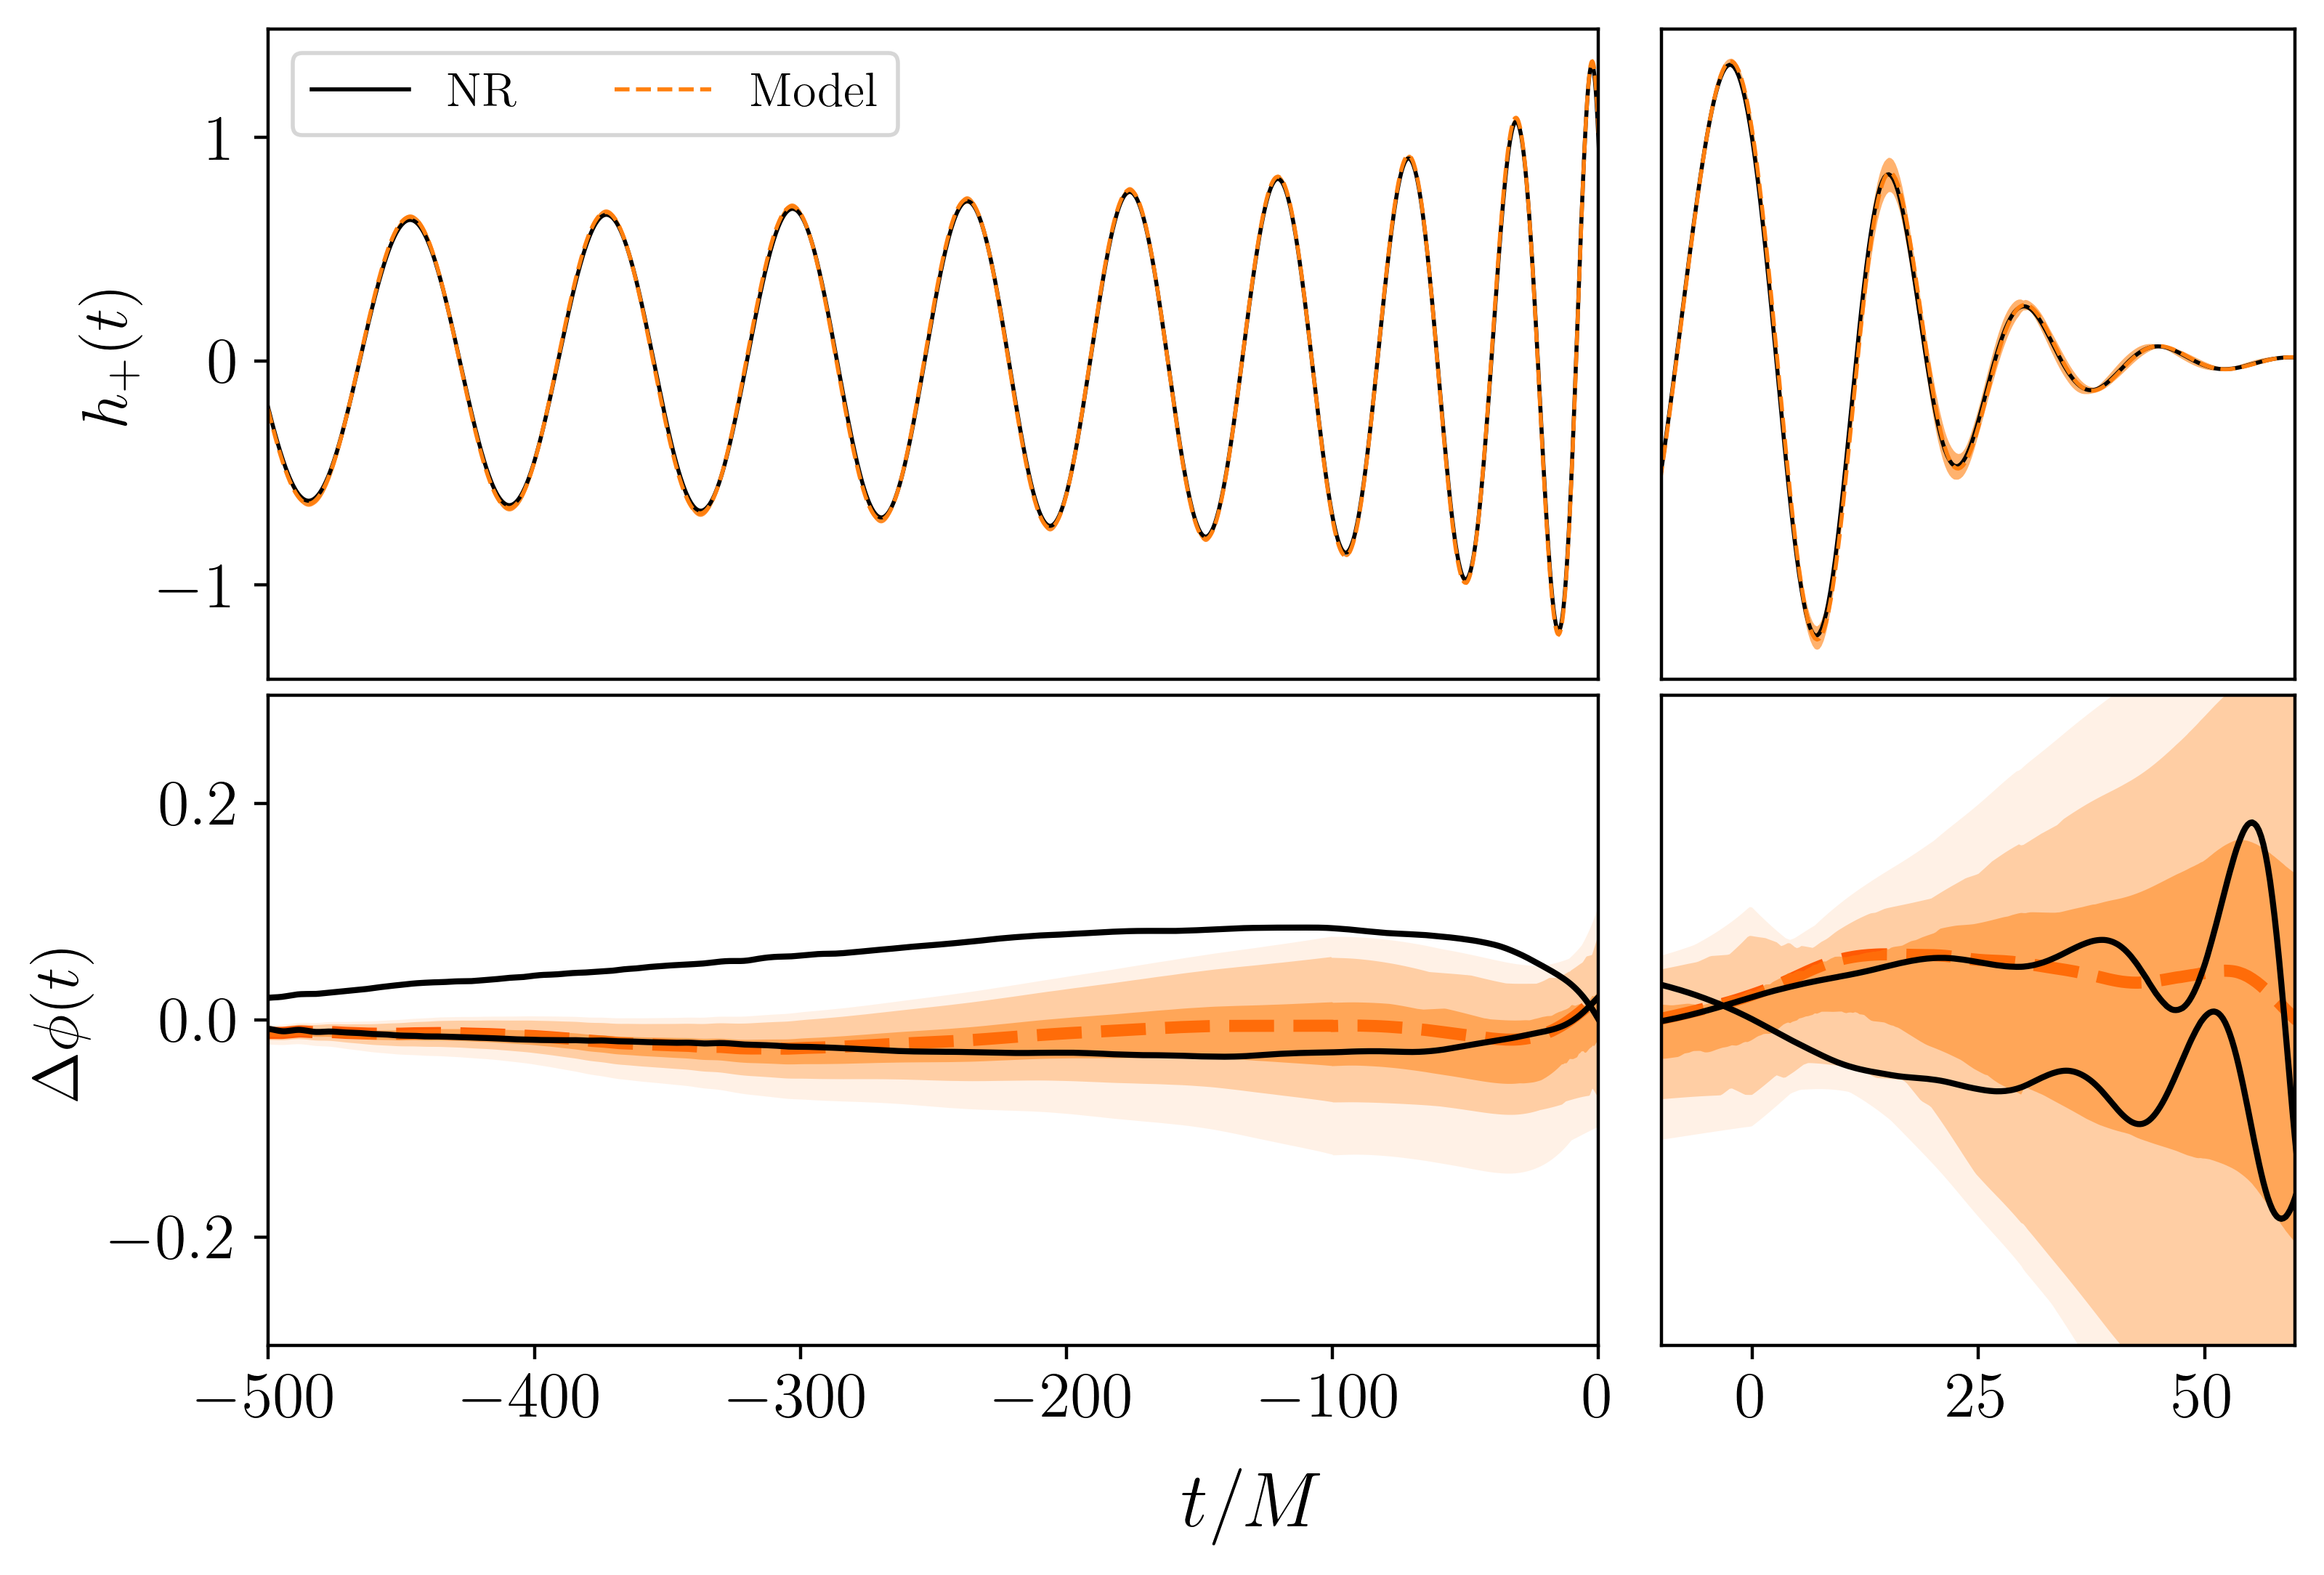

In [96]:
# model_color='C9'
model_color='C1'
# model_color='r'
# model_color='salmon'
# model_color='deepskyblue'

t_marker = -10
fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=400)
gs = GridSpec(4, 3, figure=fig, wspace=0.1, hspace=0.05)
ax0 = fig.add_subplot(gs[:2, :2])
plt.plot(t_, h_nr, lw=1, color='k', label='NR')
plt.plot(t_, h_bar, c=model_color, ls='--', lw=1, label='Model')
# plt.xlim(-500, t_marker)
plt.xlim(-500, 0)
# plt.xlim(-500, 60)
plt.xticks([])
plt.ylabel(r'$h_+(t)$')

plt.legend(ncol=2, loc='upper left', fontsize=12)
# plt.text(-490, 1.15, rf"$\rm{{Match}} = {{{m_bar:.5f}}}_{{\,\,{m_5:.5f}}}^{{\,\,{m_95:.5f}}}$");

w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($99^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color=model_color, alpha=0.9, lw=0);

ax2 = fig.add_subplot(gs[:2, 2:])
plt.plot(t_, h_nr, lw=1, color='k', label='NR')
plt.plot(t_, h_bar, c=model_color, ls='--', lw=1, label='Model')
w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($99^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color=model_color, alpha=0.6, lw=0.);
plt.yticks([])
plt.xticks([])
plt.xlim(t_marker, 60)

ax3 = fig.add_subplot(gs[2:, :2])
plt.plot(t_, phi_diff_nr_nr.T, c='k')
plt.plot(t_, phi_diff_nr_bar, color='orangered', lw=3, ls='--',  zorder=1)


w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($99^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color=model_color, alpha=0.1, lw=0);
w=90
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($90^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color=model_color, alpha=0.3, lw=0);
w=50
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($50^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color=model_color, alpha=0.5, lw=0);
# plt.xlim(-500, t_marker)
plt.xlim(-500, 0)
# plt.xlim(-500, 60)
plt.ylim(-0.3, 0.3)
plt.ylabel(r'$\Delta \phi (t)$')

ax4 = fig.add_subplot(gs[2:, 2:])
plt.plot(t_, phi_diff_nr_nr.T, c='k')
plt.plot(t_, phi_diff_nr_bar, color='orangered', lw=3, ls='--',  zorder=1)
w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($99^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color=model_color, alpha=0.1, lw=0);
w=90
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($90^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color=model_color, alpha=0.3, lw=0);
w=50
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($50^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color=model_color, alpha=0.5, lw=0);
plt.yticks([])
plt.xlim(t_marker, 60)
plt.ylim(-0.3, 0.3)

fig.supxlabel("$t/M$")
# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_and_phase.png")

99 0.5 99.5 99.0
99 0.5 99.5 99.0
90 5.0 95.0 90.0
50 25.0 75.0 50.0


Text(0.5, 0.01, '$t/M$')

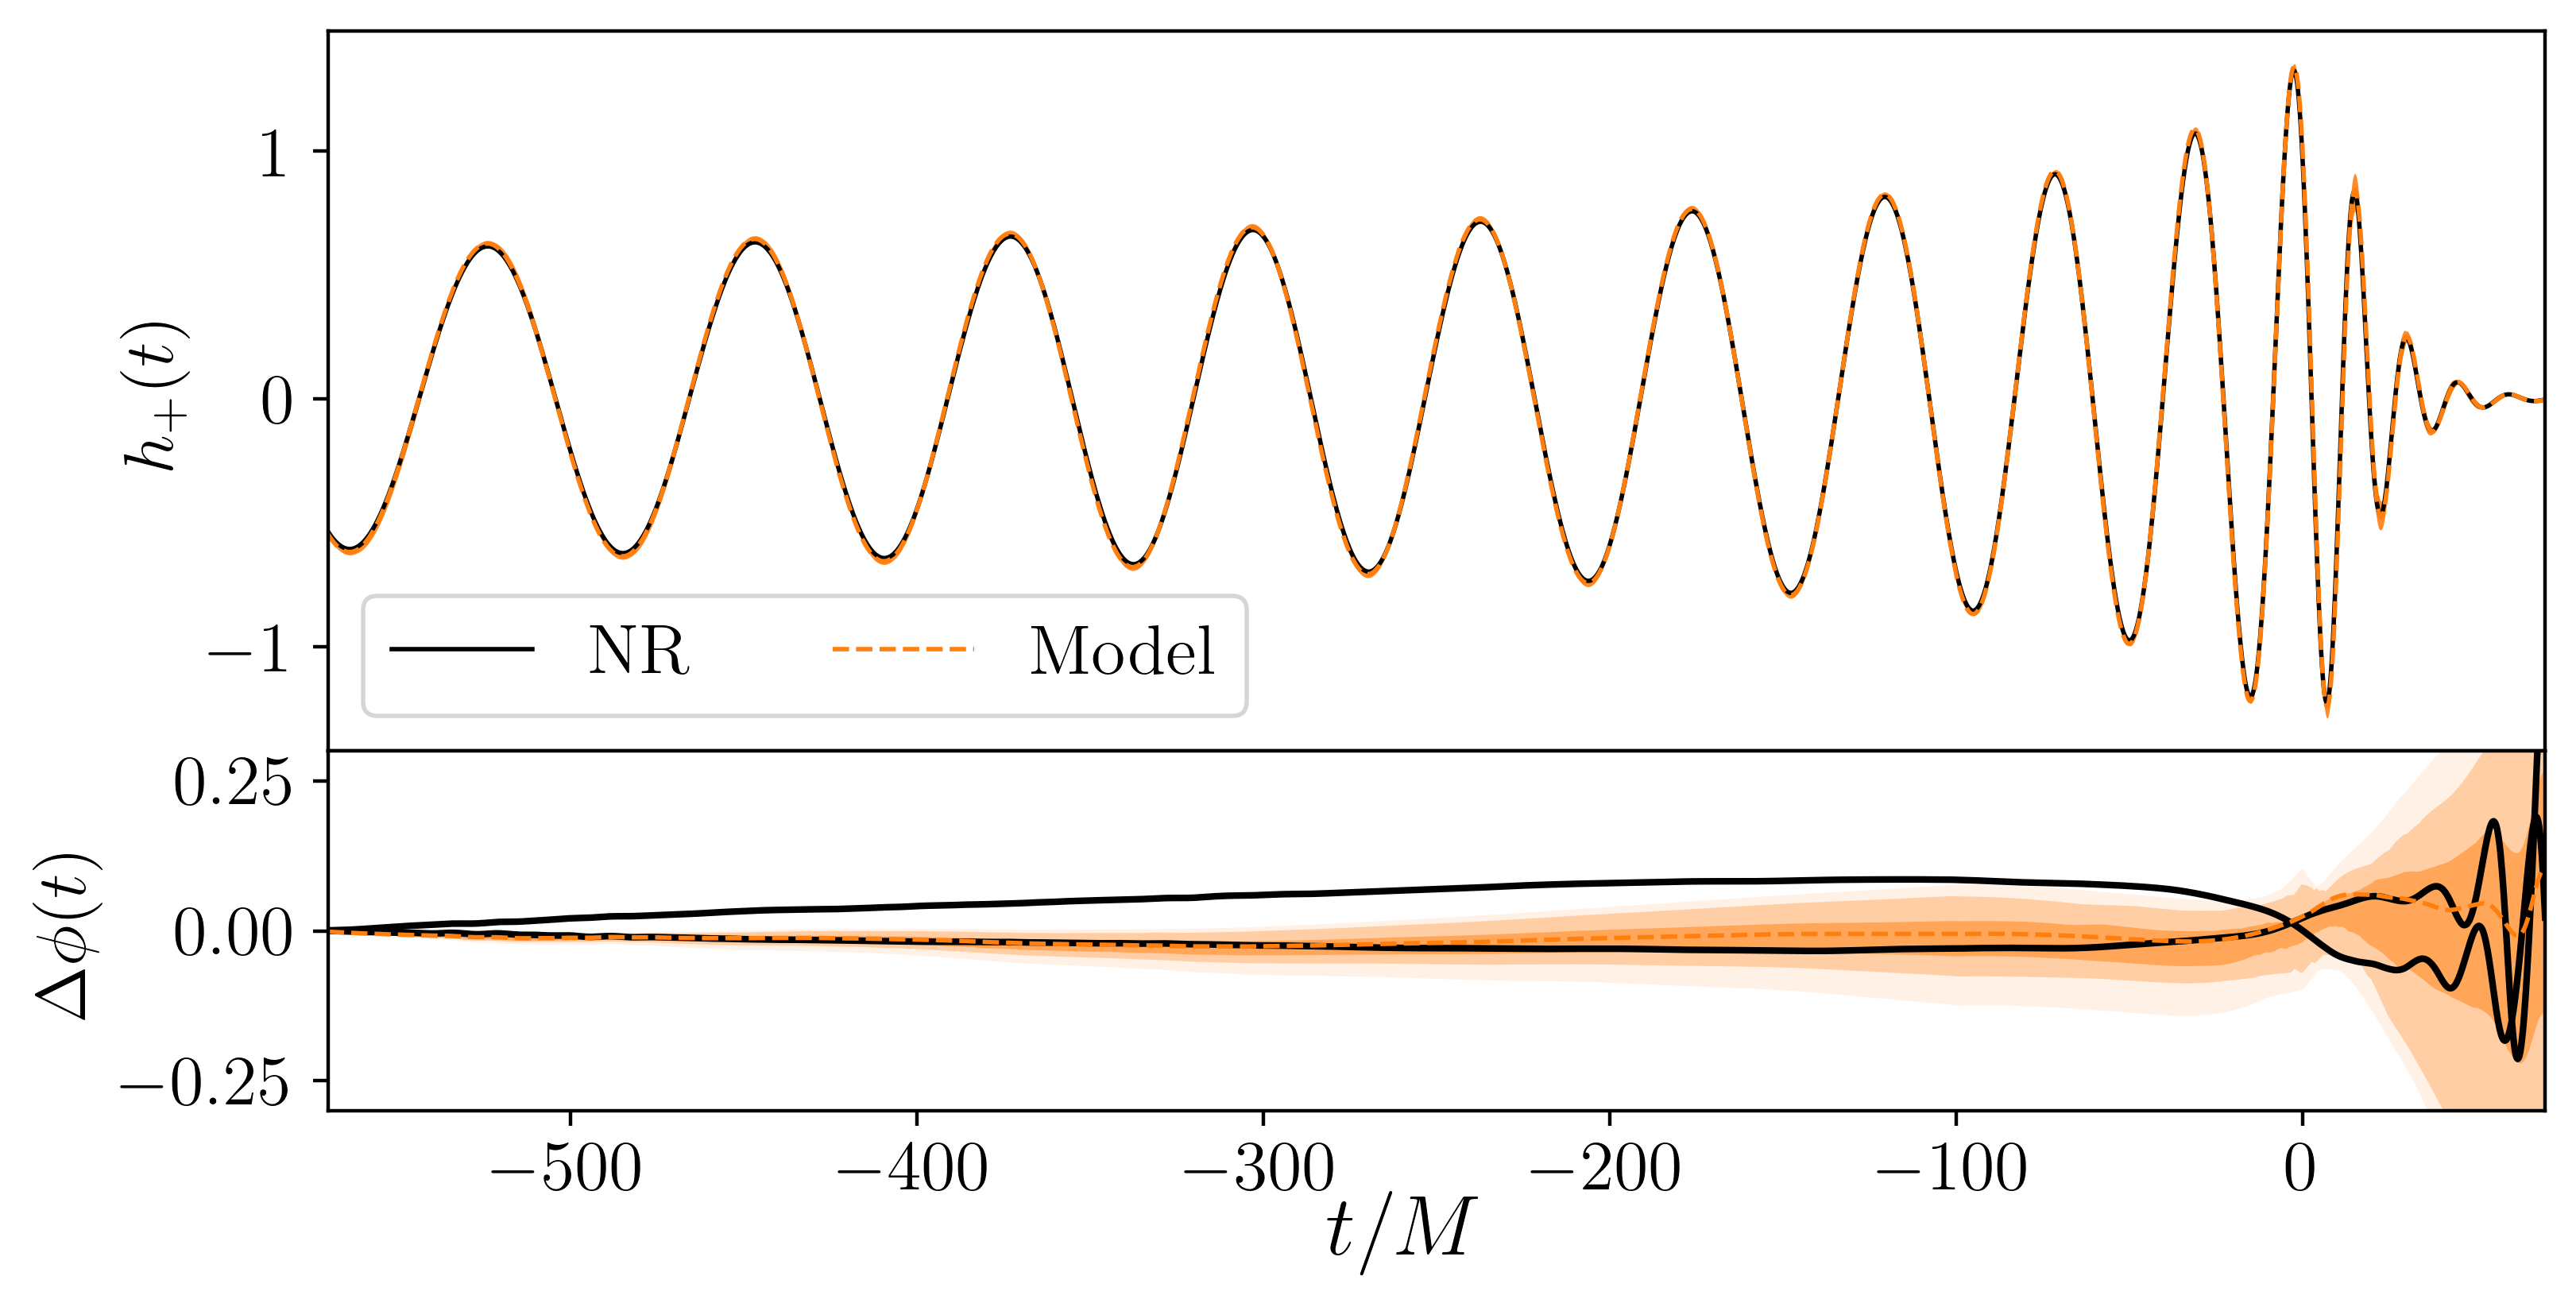

In [74]:
# fig = plt.figure(figsize=(6,4), dpi=200)
# fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
fig = plt.figure(figsize=(6*1.5,3*1.5), dpi=400)
gs = GridSpec(3, 1, figure=fig, wspace=0.0, hspace=0.)
ax0 = fig.add_subplot(gs[:2, 0])
plt.plot(t_, h_nr, lw=1, color='k', label='NR')
# plt.plot(t_, h_nr_other.T, lw=1, color='k', alpha=0.5)
plt.plot(t_, h_bar, c='C1', ls='--', lw=1, label='Model')
# plt.plot(times_M, h_samples[0], color='deepskyblue',  alpha=0.3, ls='--')
# plt.plot(t_, h_samples[1:3].T, color='deepskyblue',  alpha=0.3, ls='--')
# plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color='C1', alpha=0.3);
# plt.fill_between(t_, y1=np.percentile(h_samples, 5, 0), y2=np.percentile(h_samples, 95, 0), color='C1', alpha=0.3);

w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($99^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color='C1', alpha=0.9, lw=0);
# w=90
# p1=(100-w)/2
# p2=100 - (100-w)/2
# print(w, p1, p2, p2-p1)
# # ($90^{\rm{th}}\%$ width)
# plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color='C1', alpha=0.3);
# w=50
# p1=(100-w)/2
# p2=100 - (100-w)/2
# print(w, p1, p2, p2-p1)
# # ($50^{\rm{th}}\%$ width)
# plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color='C1', alpha=0.5);


plt.legend(ncol=2, loc='lower left')


plt.xlim(-570, 70)
# plt.xlim(-100, 70)
# plt.xlim(-200, 70)
plt.xticks([])
plt.ylabel(r'$h_+(t)$')

# plt.text(-560, 1.2, rf"$\rm{{Match}} = {{{m_bar:.5f}}}_{{\,\,{m_5:.5f}}}^{{\,\,{m_95:.5f}}}$");



ax1 = fig.add_subplot(gs[2:, 0])
plt.plot(t_, phi_diff_nr_nr.T, c='k')
plt.plot(t_, phi_diff_nr_bar, color='C1', lw=1, ls='--')
# plt.plot(t_, phi_diff_nr_samples[0], color='C1', alpha=0.7, ls='-')
# plt.plot(t_, phi_diff_nr_samples[3:5].T, color='C1', alpha=0.7, ls='-')
# plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color='C1', alpha=0.4);
# plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, 5, 0), y2=np.percentile(phi_diff_nr_samples, 95, 0), color='C1', alpha=0.4);
# plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, 1, 0), y2=np.percentile(phi_diff_nr_samples, 99, 0), color='C1', alpha=0.4);

w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($99^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color='C1', alpha=0.1, lw=0);
w=90
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($90^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color='C1', alpha=0.3, lw=0);
w=50
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($50^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color='C1', alpha=0.5, lw=0);



plt.xlim(-570, 70)
# plt.xlim(-100, 70)
# plt.xlim(-200, 70)
plt.ylim(-0.3,0.3)
# plt.ylim(-0.59,0.52)
plt.ylabel(r'$\Delta \phi (t)$')
# plt.grid(lw=0.3, ls='--')
fig.supxlabel("$t/M$")




# plt.savefig("/Users/sebastian.khan/Desktop/waveform_and_phase.png", bbox_inches = 'tight')
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_and_phase.png")

# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_and_phase.png")

Text(0.5, 0.01, '$t/M$')

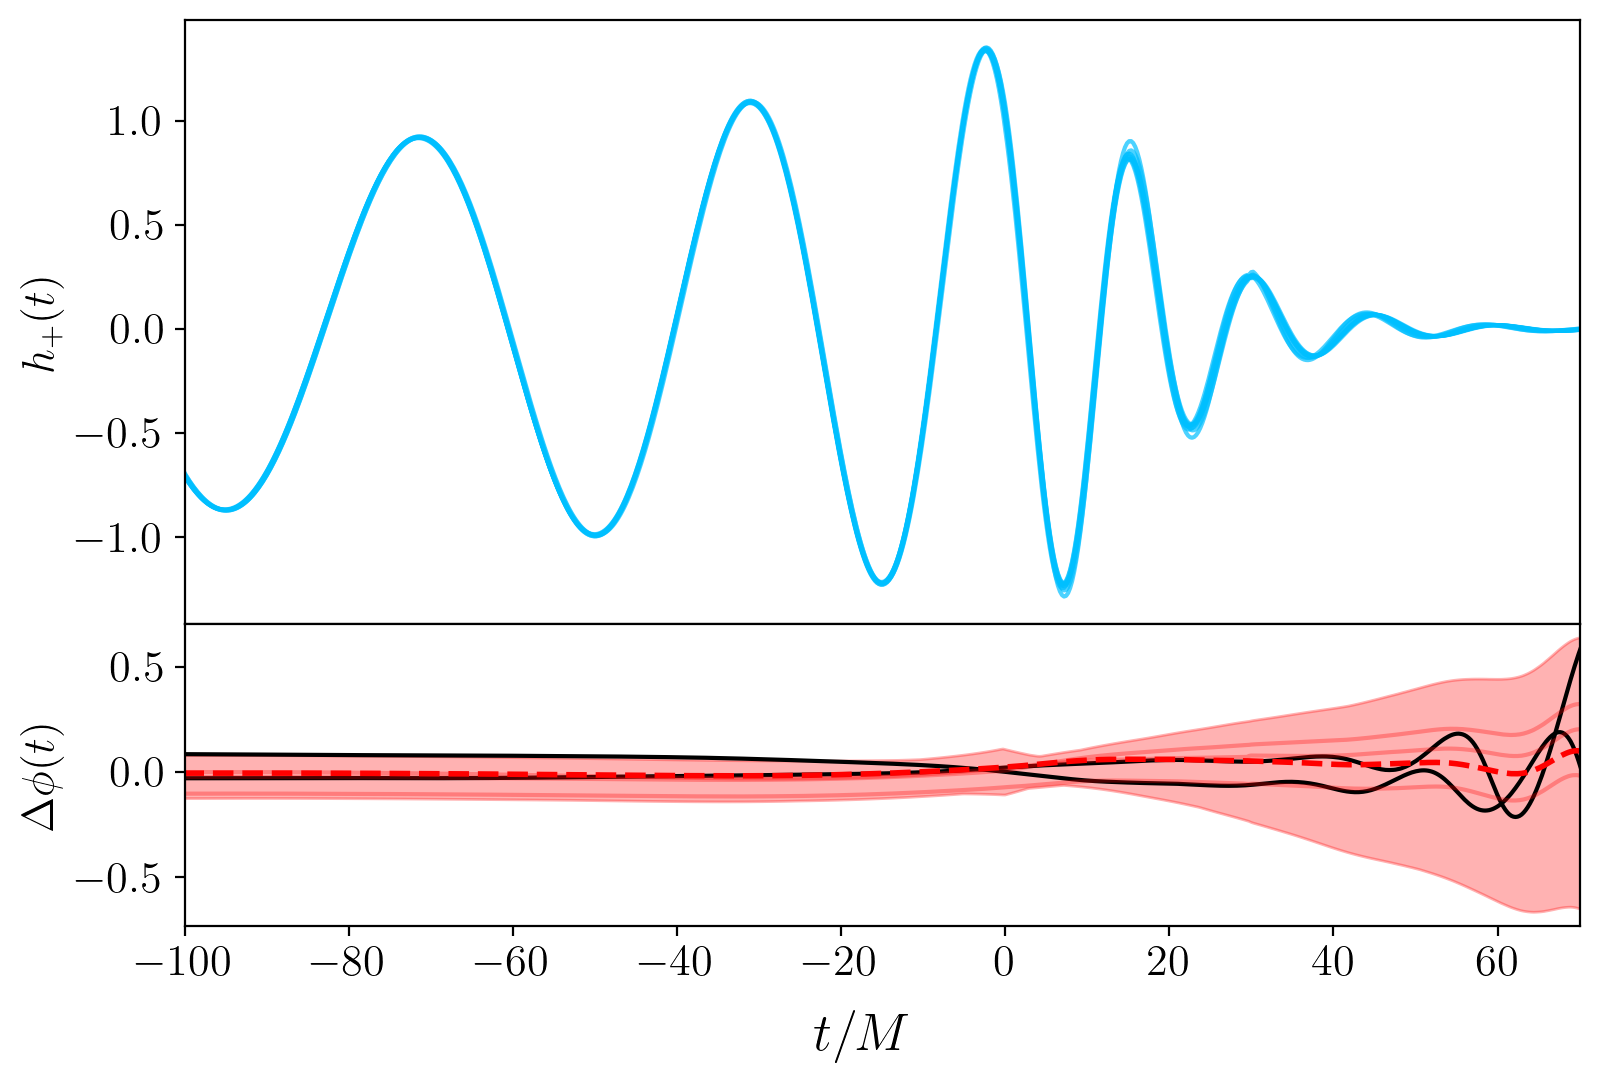

In [75]:
# fig = plt.figure(figsize=(6,4), dpi=200)
# fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
gs = GridSpec(3, 1, figure=fig, wspace=0.0, hspace=0.)
ax0 = fig.add_subplot(gs[:2, 0])
# plt.plot(t_, h_nr, lw=2, color='k')
# plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
# plt.plot(t_, h_bar, c='r', ls='--', lw=1)
# plt.plot(times_M, h_samples[0], color='deepskyblue',  alpha=0.3, ls='--')
plt.plot(t_, h_samples[1:10].T, color='deepskyblue',  alpha=0.7, ls='-')
# plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color='r', alpha=0.3);
# plt.xlim(-570, 70)
plt.xlim(-100, 70)
plt.xticks([])
plt.ylabel(r'$h_+(t)$')

# plt.text(-560, 1.2, rf"$Match = {{{m_bar:.5f}}}_{{\,\,{m_5:.5f}}}^{{\,\,{m_95:.5f}}}$");

ax1 = fig.add_subplot(gs[2:, 0])
plt.plot(t_, phi_diff_nr_nr.T, c='k')
plt.plot(t_, phi_diff_nr_bar, color='r', lw=2, ls='--')
plt.plot(t_, phi_diff_nr_samples[0], color='r', alpha=0.3, ls='-')
plt.plot(t_, phi_diff_nr_samples[3:5].T, color='r', alpha=0.3, ls='-')
plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color='r', alpha=0.3);
# plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, 5, 0), y2=np.percentile(phi_diff_nr_samples, 95, 0), color='r', alpha=0.3);
# plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, 1, 0), y2=np.percentile(phi_diff_nr_samples, 99, 0), color='r', alpha=0.4);


# plt.xlim(-570, 70)
plt.xlim(-100, 70)
# plt.ylim(-0.59,0.52)
# plt.ylim(-0.59,0.52)
plt.ylabel(r'$\Delta \phi (t)$')
# plt.grid()
fig.supxlabel("$t/M$")




In [76]:
# col='deepskyblue'
# fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
# gs = GridSpec(3, 3, figure=fig, wspace=0.0, hspace=0.)
# ax0 = fig.add_subplot(gs[:2, :2])
# plt.plot(t_, h_nr, lw=2, color='k')
# # plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
# plt.plot(t_, h_bar, c=col, ls='--', lw=1)
# plt.plot(t_, h_samples[0], color=col,  alpha=0.3, ls='--')
# plt.plot(t_, h_samples[1:3].T, color=col,  alpha=0.3, ls='--')
# plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color=col, alpha=0.5);
# # plt.xlim(-600, -10)
# plt.xticks([])
# plt.ylabel(r'$h_+(t)$')

# ax1 = fig.add_subplot(gs[2:, :2])
# plt.plot(t_, phi_diff_nr_nr.T, c='k')
# plt.plot(t_, phi_diff_nr_bar, color=col, ls='--', lw=1)
# plt.plot(t_, phi_diff_nr_samples[0], color=col, alpha=0.5, ls='--')
# plt.plot(t_, phi_diff_nr_samples[1:3].T, color=col, alpha=0.5, ls='--')
# plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color=col, alpha=0.3);

# plt.ylabel(r'$\Delta \phi (t)$')
# # plt.xlim(-600, -10)
# plt.ylim(-0.5,0.5)

# ax2 = fig.add_subplot(gs[:2, 2:])
# plt.plot(t_, h_nr, lw=2, color='k')
# # plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
# plt.plot(t_, h_bar, c=col, ls='--', lw=1)
# plt.plot(t_, h_samples[0], color=col,  alpha=0.3, ls='--')
# plt.plot(t_, h_samples[1:3].T, color=col,  alpha=0.3, ls='--')
# plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color=col, alpha=0.5);
# plt.xlim(-10, 70)
# plt.xticks([])
# plt.yticks([])

# ax3 = fig.add_subplot(gs[2:, 2:])
# plt.plot(t_, phi_diff_nr_nr.T, c='k')
# plt.plot(t_, phi_diff_nr_bar, color=col, ls='--')
# plt.plot(t_, phi_diff_nr_samples[0], color=col, alpha=0.3, ls='--')
# plt.plot(t_, phi_diff_nr_samples[1:3].T, color=col, alpha=0.3, ls='--')
# plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color=col, alpha=0.3);
# plt.yticks([])
# plt.xlim(-10, 70)
# plt.ylim(-0.5,0.5)

# fig.supxlabel("$t/M$")
# # plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_and_phase.png")